In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

In [4]:
df = pd.read_csv("data/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


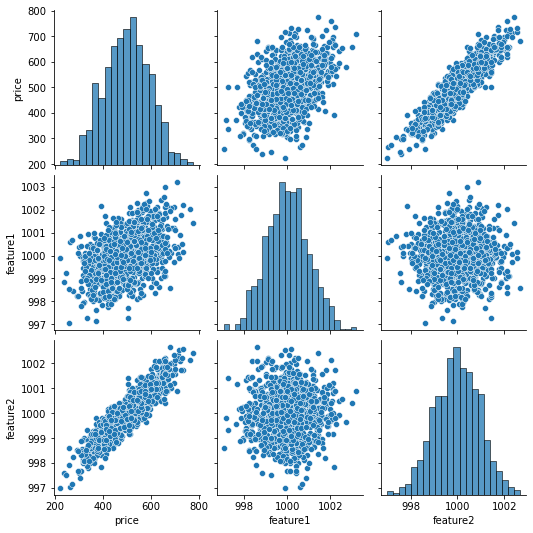

In [5]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(700, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Simple dense NN
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [24]:
model.fit(x=X_train, y=y_train, epochs=300, verbose=0)

<AxesSubplot:>

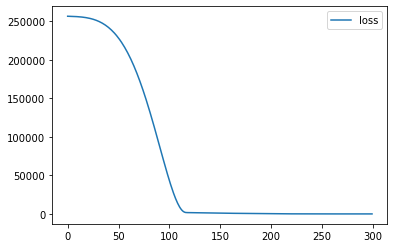

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [26]:
model.evaluate(X_test, y_test, verbose=0)

24.995704650878906